# Import Libraries

In [43]:
import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)

#pandas
import pandas as pd

#numpy
import numpy as np

#sklearn 
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix,auc, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

#matplotlib, seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#stats
import math
from scipy.stats import uniform, randint

#XGboost
import xgboost as xgb

#shap
import shap
shap.initjs()

#pickle
import pickle

#time
import time

print("All the required libraries are imported successfully")

All the required libraries are imported successfully


# Extract & Display data

In [3]:
"""Creating a dataframe from CSV file"""

data = pd.read_csv("UCI_Credit_Card.csv",index_col=0)

"""Renaming the target column and PAY_0"""

data.rename(columns = {
    'default.payment.next.month' : 'Default_Target','PAY_0':'PAY_1'}, inplace=True)

"""Printing the data columns information"""

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LIMIT_BAL       30000 non-null  float64
 1   SEX             30000 non-null  int64  
 2   EDUCATION       30000 non-null  int64  
 3   MARRIAGE        30000 non-null  int64  
 4   AGE             30000 non-null  int64  
 5   PAY_1           30000 non-null  int64  
 6   PAY_2           30000 non-null  int64  
 7   PAY_3           30000 non-null  int64  
 8   PAY_4           30000 non-null  int64  
 9   PAY_5           30000 non-null  int64  
 10  PAY_6           30000 non-null  int64  
 11  BILL_AMT1       30000 non-null  float64
 12  BILL_AMT2       30000 non-null  float64
 13  BILL_AMT3       30000 non-null  float64
 14  BILL_AMT4       30000 non-null  float64
 15  BILL_AMT5       30000 non-null  float64
 16  BILL_AMT6       30000 non-null  float64
 17  PAY_AMT1        30000 non-null 

## Data Definition

There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- Deafult_Target: Default payment (1=yes, 0=no)

In [3]:
# DataFrame Display

def display_all(data):
    
    """display the dataframe columns at once"""
    
    with pd.option_context("display.max_rows",1000):
        with pd.option_context("display.max_columns",1000):
            display(data)
            
display_all(data)

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
ID                                                                            
1        20000.0    2          2         1   24      2      2     -1     -1   
2       120000.0    2          2         2   26     -1      2      0      0   
3        90000.0    2          2         2   34      0      0      0      0   
4        50000.0    2          2         1   37      0      0      0      0   
5        50000.0    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29996   220000.0    1          3         1   39      0      0      0      0   
29997   150000.0    1          3         2   43     -1     -1     -1     -1   
29998    30000.0    1          2         2   37      4      3      2     -1   
29999    80000.0    1          3         1   41      1     -1      0      0   
30000    50000.0    1          2         1   46      0      0      0      0   

       PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
ID                                                                           
1         -2     -2     3913.0     3102.0      689.0        0.0        0.0   
2          0      2     2682.0     1725.0     2682.0     3272.0     3455.0   
3          0      0    29239.0    14027.0    13559.0    14331.0    14948.0   
4          0      0    46990.0    48233.0    49291.0    28314.0    28959.0   
5          0      0     8617.0     5670.0    35835.0    20940.0    19146.0   
...      ...    ...        ...        ...        ...        ...        ...   
29996      0      0   188948.0   192815.0   208365.0    88004.0    31237.0   
29997      0      0     1683.0     1828.0     3502.0     8979.0     5190.0   
29998      0      0     3565.0     3356.0     2758.0    20878.0    20582.0   
29999      0     -1    -1645.0    78379.0    76304.0    52774.0    11855.0   
30000      0      0    47929.0    48905.0    49764.0    36535.0    32428.0   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
ID                                                                             
1            0.0       0.0     689.0       0.0       0.0       0.0       0.0   
2         3261.0       0.0    1000.0    1000.0    1000.0       0.0    2000.0   
3        15549.0    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0   
4        29547.0    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0   
5        19131.0    2000.0   36681.0   10000.0    9000.0     689.0     679.0   
...          ...       ...       ...       ...       ...       ...       ...   
29996    15980.0    8500.0   20000.0    5003.0    3047.0    5000.0    1000.0   
29997        0.0    1837.0    3526.0    8998.0     129.0       0.0       0.0   
29998    19357.0       0.0       0.0   22000.0    4200.0    2000.0    3100.0   
29999    48944.0   85900.0    3409.0    1178.0    1926.0   52964.0    1804.0   
30000    15313.0    2078.0    1800.0    1430.0    1000.0    1000.0    1000.0   

       Default_Target  
ID                     
1                   1  
2                   1  
3                   0  
4                   0  
5                   0  
...               ...  
29996               0  
29997               0  
29998               1  
29999               1  
30000               1  

[30000 rows x 24 columns]

# Data Exploration

## Missing Values

In [4]:
def print_null(dataframe):
    
    """checking the null values by column"""
    print("Missing value percentage by column:\n")
    missing_val_col = (dataframe.isnull().mean()).sort_values(ascending=False)
    print(missing_val_col)
    print('-'*50)
    
print_null(data)

Missing value percentage by column:

Default_Target    0.0
PAY_AMT6          0.0
SEX               0.0
EDUCATION         0.0
MARRIAGE          0.0
AGE               0.0
PAY_1             0.0
PAY_2             0.0
PAY_3             0.0
PAY_4             0.0
PAY_5             0.0
PAY_6             0.0
BILL_AMT1         0.0
BILL_AMT2         0.0
BILL_AMT3         0.0
BILL_AMT4         0.0
BILL_AMT5         0.0
BILL_AMT6         0.0
PAY_AMT1          0.0
PAY_AMT2          0.0
PAY_AMT3          0.0
PAY_AMT4          0.0
PAY_AMT5          0.0
LIMIT_BAL         0.0
dtype: float64
--------------------------------------------------


## Numerical & Categorical data columns

In [5]:
numerical_columns = data.drop(["SEX","EDUCATION","MARRIAGE","Default_Target","PAY_1","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"],axis=1)

categorical_columns = data.loc[:,["SEX","EDUCATION","MARRIAGE","PAY_1","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]]

print("Numerical Columns are \n",numerical_columns.columns)
print('-'*50)

print("Categorical Columns are \n",categorical_columns.columns)

Numerical Columns are 
 Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')
--------------------------------------------------
Categorical Columns are 
 Index(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6'],
      dtype='object')


## Plotting Categorical + Target Variables

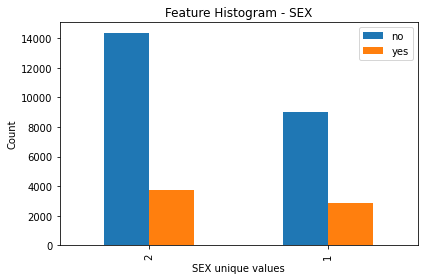

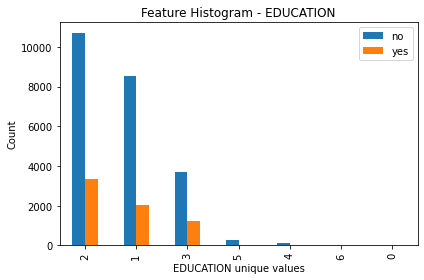

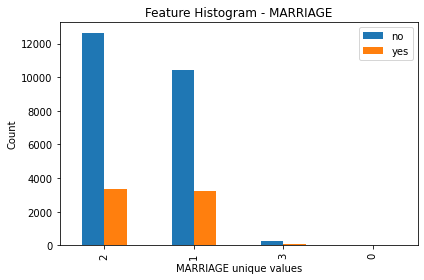

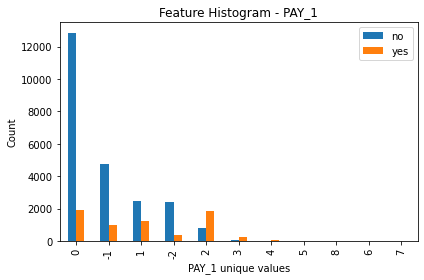

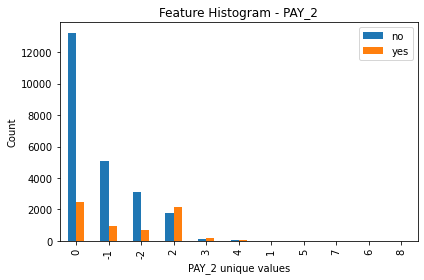

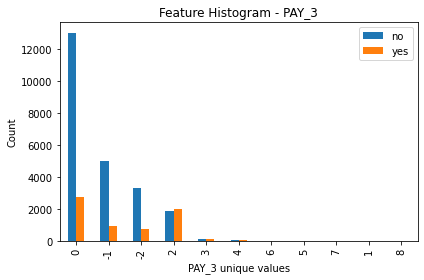

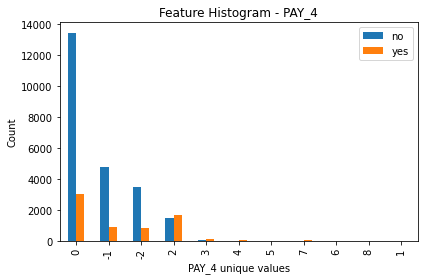

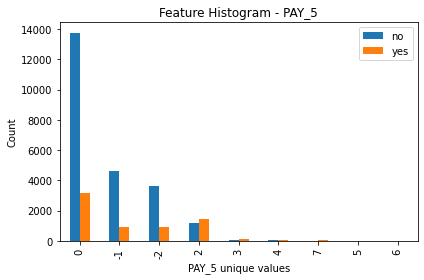

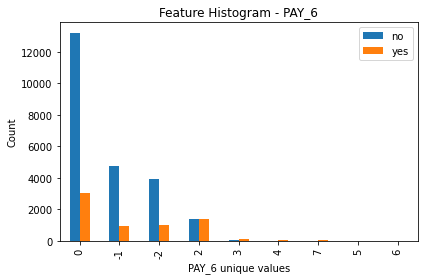

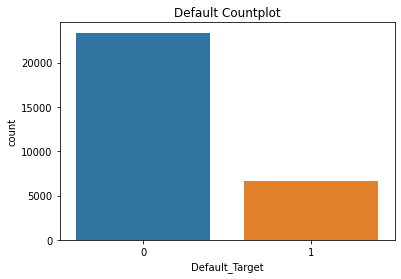

Value counts for Target 
 0    23364
1     6636
Name: Default_Target, dtype: int64


In [6]:
class ExploringData:
    
    def __init__(self, raw_df):
        self.raw_df = raw_df
        self.raw_df_grouped = raw_df.groupby("Default_Target")
        self.class_name_no = 0
        self.class_name_yes = 1
        self.raw_df_grouped_no = self.raw_df_grouped.get_group(self.class_name_no)
        self.raw_df_grouped_yes = self.raw_df_grouped.get_group(self.class_name_yes)

    def plot_histogram_continuous(self, feature_name,bin_size):
        
        #bin_size = math.ceil((self.raw_df[feature_name].max() - self.raw_df[feature_name].min())/math.sqrt(len(self.raw_df)))
        plt.figure()
        plt.hist(self.raw_df_grouped_no[feature_name], bins=bin_size, label=self.class_name_no)
        plt.hist(self.raw_df_grouped_yes[feature_name], bins=bin_size, label=self.class_name_yes)
        plt.legend()
        plt.title("Feature Histogram - "+feature_name)
        plt.xlabel("{} values".format(feature_name))
        plt.ylabel("Count")
        plt.show()

    def plot_histogram_categorical(self, feature_name):
        feature_df = pd.DataFrame()
        feature_df["no"] = self.raw_df_grouped_no[feature_name].value_counts()
        feature_df["yes"] = self.raw_df_grouped_yes[feature_name].value_counts()
        feature_df.plot(kind='bar')
        plt.title("Feature Histogram - "+feature_name)
        plt.ylabel("Count")
        plt.xlabel("{} unique values".format(feature_name))
        plt.tight_layout()
        plt.show()

    
"""Plotting all the Categorical variables"""

exploring_data=ExploringData(data)

for i in categorical_columns:
    
    exploring_data.plot_histogram_categorical(i)
    

sns.countplot(x="Default_Target",data=data)
plt.title("Default Countplot")
plt.show()

print("Value counts for Target \n",data['Default_Target'].value_counts())

## Describing & Plotting Numerical Variables Distribution

            LIMIT_BAL           AGE      BILL_AMT1      BILL_AMT2  \
count    30000.000000  30000.000000   30000.000000   30000.000000   
mean    167484.322667     35.485500   51223.330900   49179.075167   
std     129747.661567      9.217904   73635.860576   71173.768783   
min      10000.000000     21.000000 -165580.000000  -69777.000000   
25%      50000.000000     28.000000    3558.750000    2984.750000   
50%     140000.000000     34.000000   22381.500000   21200.000000   
75%     240000.000000     41.000000   67091.000000   64006.250000   
max    1000000.000000     79.000000  964511.000000  983931.000000   

          BILL_AMT3      BILL_AMT4      BILL_AMT5      BILL_AMT6  \
count  3.000000e+04   30000.000000   30000.000000   30000.000000   
mean   4.701315e+04   43262.948967   40311.400967   38871.760400   
std    6.934939e+04   64332.856134   60797.155770   59554.107537   
min   -1.572640e+05 -170000.000000  -81334.000000 -339603.000000   
25%    2.666250e+03    2326.750000    

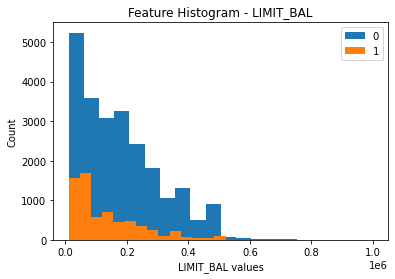

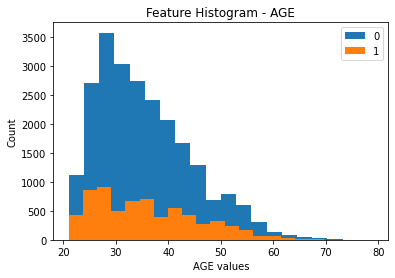

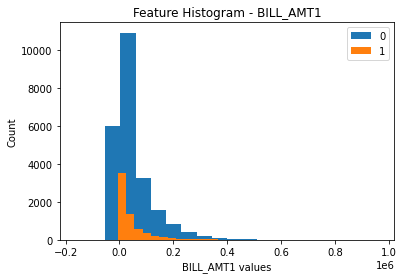

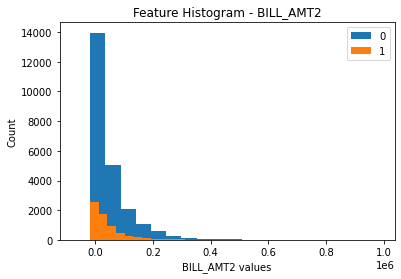

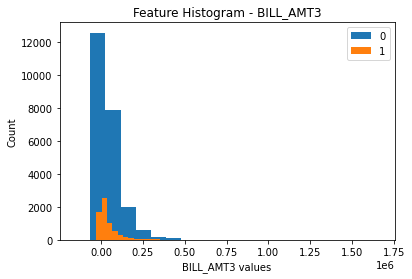

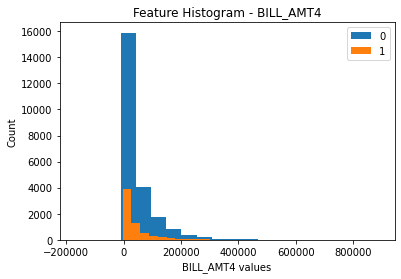

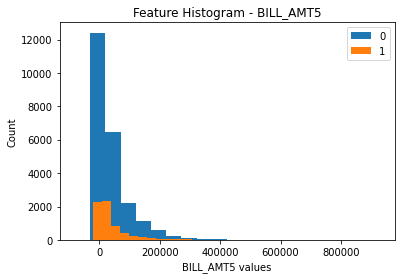

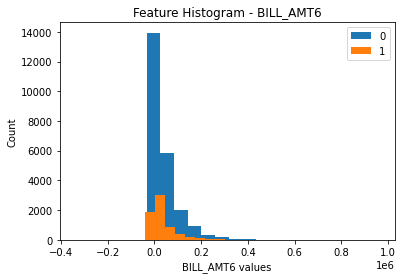

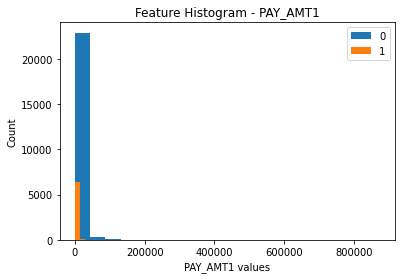

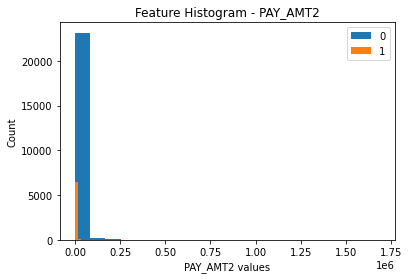

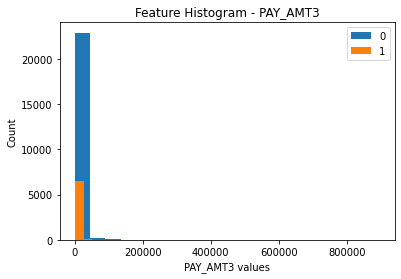

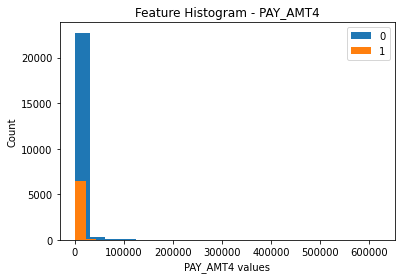

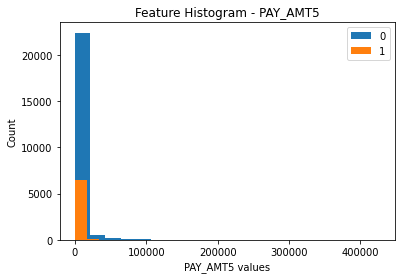

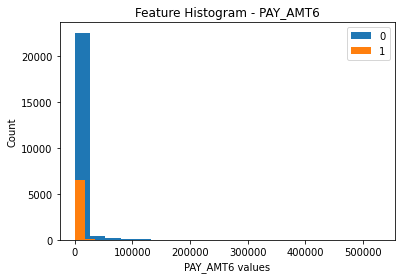

In [7]:
print(numerical_columns.describe())

for i in numerical_columns:
    
    exploring_data.plot_histogram_continuous(i,20)

## Plotting Box plots

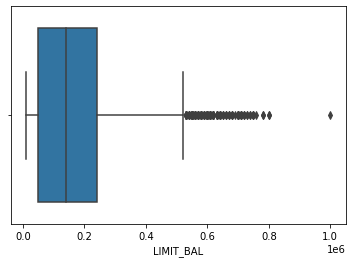

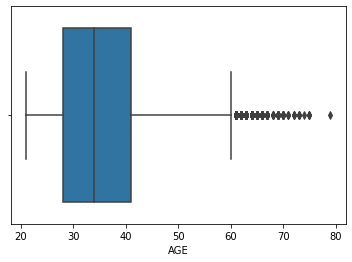

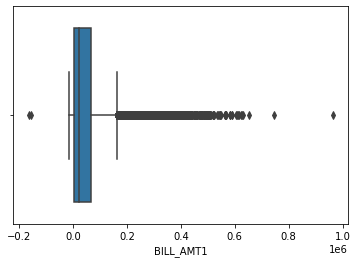

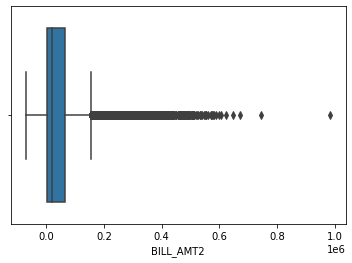

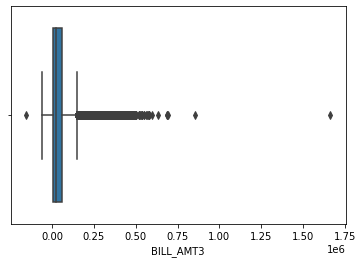

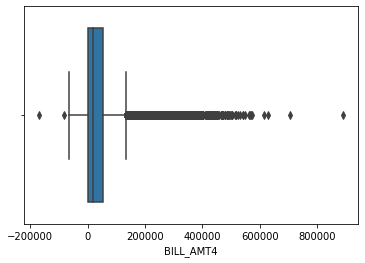

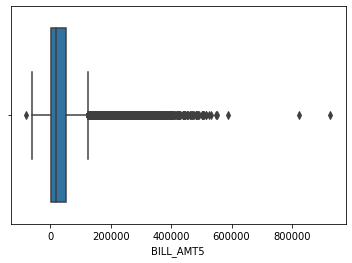

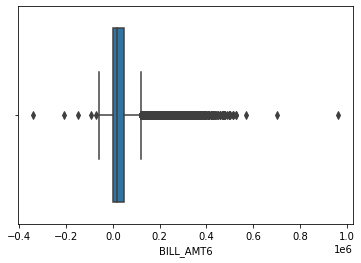

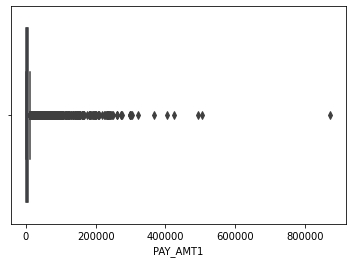

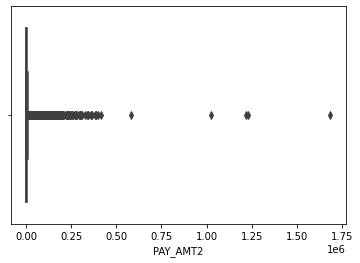

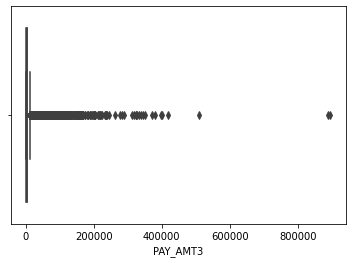

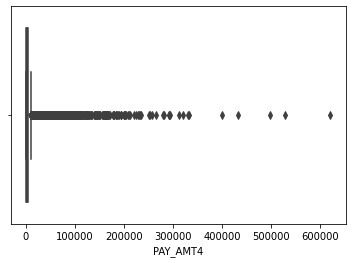

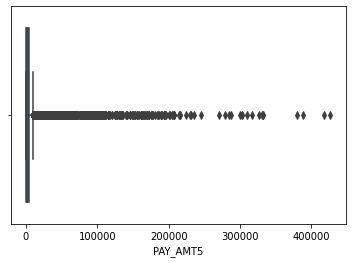

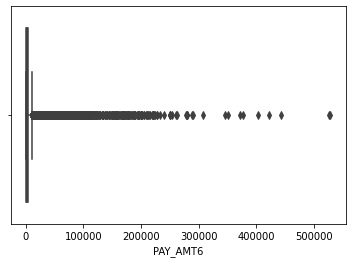

In [8]:
"""Box plots for nuerical variables"""

for i in numerical_columns.columns:
    
    sns.boxplot(i,data=data)
    plt.show()

## Bi-variate Analysis with Target

In [6]:
def groupby_analysis(column1, column2,data):
    
    print("Grouping {} with {} ".format(column1,column2))
    print(data[[column1,column2]].groupby([column1],as_index=True).mean().sort_values(by=column2,ascending=False))
    print('-'*50)
    
#binning the Age var into 3 parts
data['Age_group'] = pd.cut(data['AGE'],3)
groupby_analysis('Age_group','Default_Target',data)
data.drop('Age_group',axis=1,inplace=True)

groupby_analysis('MARRIAGE','Default_Target',data)
groupby_analysis('SEX','Default_Target',data)

Grouping Age_group with Default_Target 
                  Default_Target
Age_group                       
(59.667, 79.0]          0.283186
(40.333, 59.667]        0.236925
(20.942, 40.333]        0.214490
--------------------------------------------------
Grouping MARRIAGE with Default_Target 
          Default_Target
MARRIAGE                
3               0.260062
1               0.234717
2               0.209283
0               0.092593
--------------------------------------------------
Grouping SEX with Default_Target 
     Default_Target
SEX                
1          0.241672
2          0.207763
--------------------------------------------------


## Drop Duplicate Rows/Columns



In [7]:
"""Checking for the identity/identical columns"""
n_unique = data.apply(pd.Series.nunique)

"""There are zero identity/identical columns"""

"""Duplicate rows"""
print("Duplicate rows from the dataframe \n")
print(data[data.duplicated(keep="first")])
#print(numerical_columns[numerical_columns.duplicated(keep="first")])

"""Dropping duplicate rows"""
data.drop_duplicates(inplace=True)

print(data.shape)
#print(numerical_columns.shape)

"""Dropping Bill_AMT* variables as they are highly correlated"""

data.drop(['BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],axis=1,inplace=True)

numerical_columns_cleaned = data.drop(["SEX","EDUCATION","MARRIAGE","Default_Target","PAY_1","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"],axis=1)


Duplicate rows from the dataframe 

       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
ID                                                                            
1981    150000.0    2          1         1   38      1     -2     -2     -2   
4586    150000.0    2          1         1   31      1     -2     -2     -2   
6023    210000.0    2          1         2   39      1     -2     -2     -2   
6467    210000.0    2          2         1   49      1     -2     -2     -2   
7320    500000.0    1          1         1   43      1     -2     -2     -2   
8321    360000.0    1          2         1   41      1     -2     -2     -2   
10251    50000.0    1          2         2   26      1     -2     -2     -2   
13107   360000.0    2          1         1   49      1     -2     -2     -2   
14295    20000.0    1          2         2   24      2      2      4      4   
15459   160000.0    1          2         2   28     -2     -2     -2     -2   
15618   200000.0

## Outlier Treatment

In [8]:
"""Performing the OUTLIER treatment on Numerical columns using Isolation Forest Algorithm"""

isof = IsolationForest(contamination=0.015,random_state=42,behaviour="new")
yhat = isof.fit_predict(numerical_columns_cleaned)

mask_without_outlier = yhat != -1
mask_outlier_num = yhat == -1

data_outliers = data.loc[mask_outlier_num,:]
data_cleaned = data.loc[mask_without_outlier,:]
print("Rows which are marked outliers using Isolation Forest with contamination as 0.015 \n")
print(data_cleaned)
print('-'*50)
print("Target counts from outliers \n")
print(data_outliers.Default_Target.value_counts())

Rows which are marked outliers using Isolation Forest with contamination as 0.015 

       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
ID                                                                            
1        20000.0    2          2         1   24      2      2     -1     -1   
2       120000.0    2          2         2   26     -1      2      0      0   
3        90000.0    2          2         2   34      0      0      0      0   
4        50000.0    2          2         1   37      0      0      0      0   
5        50000.0    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29996   220000.0    1          3         1   39      0      0      0      0   
29997   150000.0    1          3         2   43     -1     -1     -1     -1   
29998    30000.0    1          2         2   37      4      3      2     -1   
29999    80000.0    1          3         1   41

## Heatmap

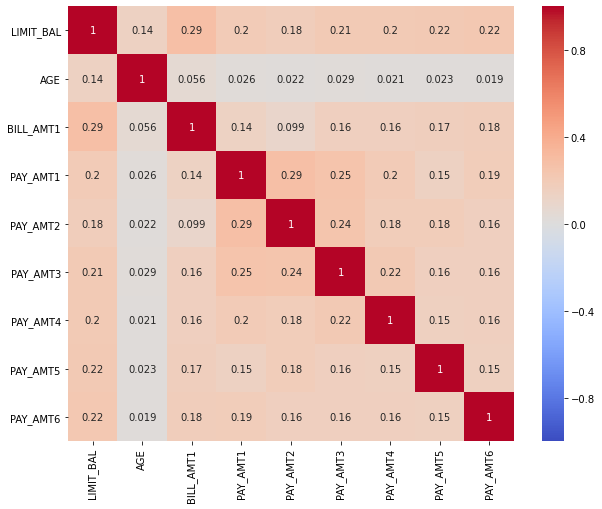

In [45]:
"""Heatmap for analysis"""

fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(numerical_columns_cleaned.corr(),vmin=-1, vmax=1, center=0, cmap='coolwarm', ax=ax,annot=True)
plt.show()

## Conclusions based on the EDA

- There are some unknown and undocumented categories in variables MARRIAGE, EDUCATION which needs to be combined with OTHERS
- As per the Data Definition PAY_* variables starts with -1(e.g Pay duly). However there are values -2 and 0 which also 
  needs to be assumed as Pay Duly
- Many customers are having very high LIMIT BALANCE compared to rest of the customer base, may be Outliers?!
- HeatMap clearly suggests extremely high CORRELATION between variables BILL_AMT*, which either needs to be dropped or converted to a Principal component
- Target variable is imbalanced in the ratio of 1:3.5 (Default : Not Default)

# Feature Engineering

## Adding the Unknown and Unspecified categories as Others

In [9]:
"""Combining the categories in EDUCATION & MARRIEAGE"""

others_education = (data_cleaned['EDUCATION']==0) | ( data_cleaned['EDUCATION']==5) | ( data_cleaned['EDUCATION']==6)
data_cleaned.loc[others_education,'EDUCATION'] = 4

others_marriage = data_cleaned['MARRIAGE'] == 0
data_cleaned.loc[others_marriage, "MARRIAGE"] =3

"""Combining the categories in EDUCATION & MARRIEAGE"""

def Pay_combine(data, column):

    duly_pay =  (data[column]==-2) | (data[column]==-1) | (data[column]==0)
    data.loc[duly_pay,column] = 0
    
"""Calling the function for all the Pay* vars"""

Pay_combine(data_cleaned,'PAY_1')
Pay_combine(data_cleaned,'PAY_2')
Pay_combine(data_cleaned,'PAY_3')
Pay_combine(data_cleaned,'PAY_4')
Pay_combine(data_cleaned,'PAY_5')
Pay_combine(data_cleaned,'PAY_6')

print("Variables Education, Marriage, and Pay_* are modified")

Variables Education, Marriage, and Pay_* are modified



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Improvising the AGE variable

In [10]:
"""We can observe here that the default probability gets higher with increase in AGE"""

conditions = [(data_cleaned['AGE']<=40),(data_cleaned['AGE']>40) & (data_cleaned['AGE']<=60),(data_cleaned['AGE']>60)]
values=[0,1,2]  # 0-Young   1- Middle Age   2- Senior

print("Converting Age_group to bins as per conditions")
data_cleaned['Age_group'] = np.select(conditions,values)
print(data_cleaned['Age_group'].value_counts())
print('-'*50)

print("Dropping the AGE variable")
data_cleaned.drop("AGE",axis=1,inplace=True)

Converting Age_group to bins as per conditions
0    21433
1     7823
2      259
Name: Age_group, dtype: int64
--------------------------------------------------
Dropping the AGE variable



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Modelling the Data

## Train-Test Split

In [42]:
X = data_cleaned.drop("Default_Target",axis=1)
y = data_cleaned.Default_Target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42,shuffle=True)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(22136, 18)
(22136,)
(7379, 18)
(7379,)


## Model Training

In [48]:
"""Perform data modeling on train data after split{use 75% portion of data for model training and 25% for model testing}"""

xg_boost = xgb.XGBClassifier(objective="binary:logistic",eval_metric="auc")


def train_model(model,train_data, train_target):
    
    print("Training the model with {}:\n".format(model))
    model.fit(train_data,train_target)
    
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

    
"""Function calls for AdaBoost and GradientBoost"""
    
#train_model(xg_boost, X_train, y_train)

"""Applying RandomizedSearchCV for XGBoost"""

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "scale_pos_weight": [4,5,6], # default 1
    "max_depth": [2,5,7,10,12], # default 3
    "n_estimators": randint(100, 650), # default 100
    "subsample": uniform(0.6, 0.4)
}

search_random = RandomizedSearchCV(xg_boost, param_distributions=params, random_state=42, n_iter=200, cv=5, verbose=1, n_jobs=-1, return_train_score=True)
print("Training the model with {}:\n".format(search_random))
search_random.fit(X_train,y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)])
print("Reporting best scores: \n")
report_best_scores(search_random.cv_results_, 3)
best_model = search_random.best_estimator_


Training the model with RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, eval_metric='auc',
       gamma=None, gpu_id=None, importance_type='gain',
       interaction_constraints=None, learning_rate=None,
       max_delta_step=None, max_dept..._pos_weight=None, subsample=None, tree_method=None,
       validate_parameters=None, verbosity=None),
          fit_params=None, iid='warn', n_iter=200, n_jobs=-1,
          param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002BF8299FCC0>, 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002BF8299FF60>, 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002BF829AD470>, 'scal...F809BAB38>, 'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002BF8034C5C0>},
          pre_dispatch='2*

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  4.9min finished


[0]	validation_0-auc:0.72647
Will train until validation_0-auc hasn't improved in 5 rounds.
[1]	validation_0-auc:0.74652
[2]	validation_0-auc:0.75599
[3]	validation_0-auc:0.75935
[4]	validation_0-auc:0.76201
[5]	validation_0-auc:0.76287
[6]	validation_0-auc:0.76444
[7]	validation_0-auc:0.76413
[8]	validation_0-auc:0.76469
[9]	validation_0-auc:0.76573
[10]	validation_0-auc:0.76589
[11]	validation_0-auc:0.76600
[12]	validation_0-auc:0.76700
[13]	validation_0-auc:0.76737
[14]	validation_0-auc:0.76795
[15]	validation_0-auc:0.76771
[16]	validation_0-auc:0.76886
[17]	validation_0-auc:0.76895
[18]	validation_0-auc:0.76870
[19]	validation_0-auc:0.76873
[20]	validation_0-auc:0.76903
[21]	validation_0-auc:0.76874
[22]	validation_0-auc:0.76848
[23]	validation_0-auc:0.76870
[24]	validation_0-auc:0.76858
[25]	validation_0-auc:0.76874
Stopping. Best iteration:
[20]	validation_0-auc:0.76903

Reporting best scores: 

Model with rank: 1
Mean validation score: 0.768 (std: 0.004)
Parameters: {'colsample_

## Load saved model

In [49]:
# save the model to disk
filename = 'xgboost.sav'
#pickle.dump(best_model, open(filename, 'wb'))
 
# load the model from disk
best_model = pickle.load(open(filename, 'rb'))

## Model Evaluation

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   26.8s remaining:   40.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.9s finished


Cross-Validation score for XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8487627205236312,
       eval_metric='auc', gamma=0.04052310795382397, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.0960549605849434, max_delta_step=0, max_depth=12,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=213, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=4, subsample=0.7922346309306592,
       tree_method='exact', validate_parameters=1, verbosity=None) : 0.7921942771499172
--------------------------------------------------
Predicting the outcomes using XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8487627205236312,
       eval_metric='auc', gamma=0.04052310795382397, gpu_id=-1,
       importance_t

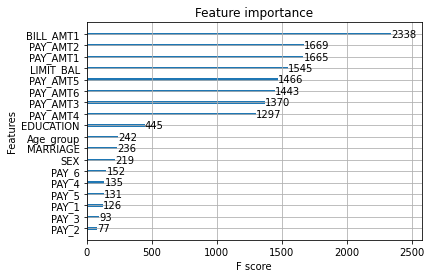

In [50]:
def cross_val(model,train_data,train_target):

    cv = cross_val_score(model,train_data,train_target,cv=5,verbose=2,n_jobs=-1)
    print("Cross-Validation score for {} : {}".format(model,cv.mean()))
    print("-"*50)

def model_evaluation(model,test_data,test_target):
    
    print("Predicting the outcomes using {}".format(model))
    print('.'*50)
    y_pred = model.predict(test_data)
    print("Classification report using {} \n".format(model))
    print(classification_report(y_pred,test_target))
    print('-'*50)
    print("Confusion matrix using {} \n".format(model))
    print(confusion_matrix(y_pred,test_target))
    print('-'*50)
    print("ROC AUC score using {} \n".format(model))
    print(roc_auc_score(y_pred,test_target))
    print('-'*50)
    print("Let's look at the feature importances as well: \n")
    print(pd.DataFrame(list(zip(test_data.columns.values,model.feature_importances_)),columns=['Variables','Values'],index=None).sort_values(by='Values',ascending=False))
    print('-'*50)
    print('\n')

def plot_roc_auc(model, test_data):
    
    y_pred = model.predict(test_data)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr,tpr)
    print("ROC AUC plot")
    # Plot ROC
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
"""Function call for XG Boost- RandomizedSearch Best Estimator"""
cross_val(best_model, X_train,y_train) 
model_evaluation(best_model,X_test,y_test)
xgb.plot_importance(best_model)

ROC AUC plot


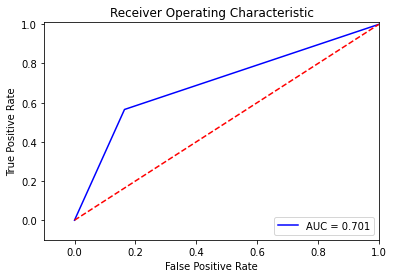

In [51]:
plot_roc_auc(best_model,X_test)

# SHAP

In [18]:
"""Training the SHAP model"""
start = time.time()
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
end = time.time()

print("Number of Seconds for training the SHAP explainer",end - start)

Number of Seconds for training the SHAP explainer 11.352152109146118


## Summary Plot

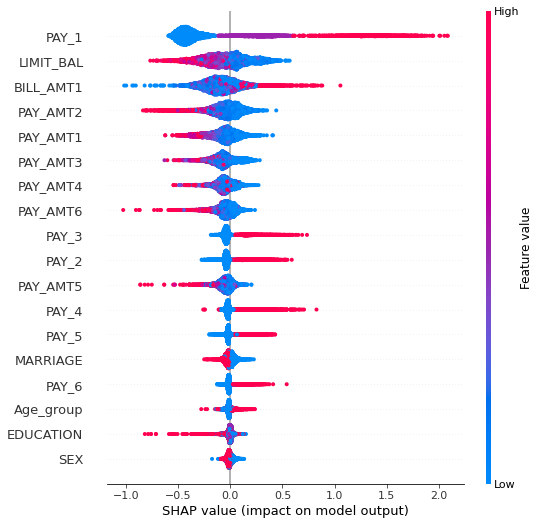

Number of Seconds for training the SHAP summary_plot 1.1350748538970947


In [21]:
start = time.time()
shap.summary_plot(shap_values, X_test)
end = time.time()
print("Number of Seconds for training the SHAP summary_plot",end - start)

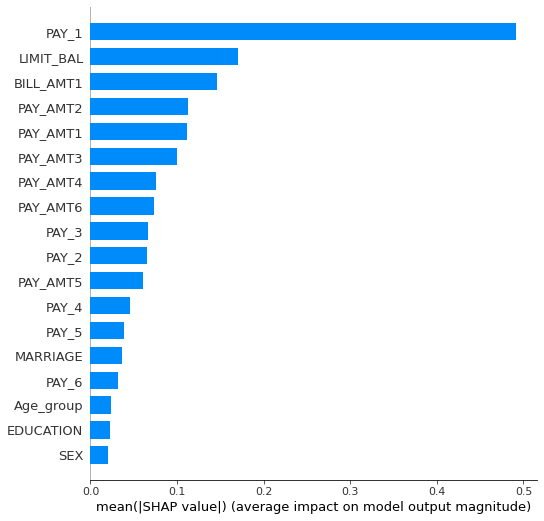

Number of Seconds for training the SHAP summary_plot 0.17200493812561035


In [22]:
"""SUMMARY Bar plot"""
start = time.time()
shap.summary_plot(shap_values, X_test,plot_type='bar')
end = time.time()
print("Number of Seconds for training the SHAP summary_plot",end - start)

## Force Plot

In [28]:
"""Force plot for the first prediciton in Test set"""
start = time.time()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])
plt.show()
end = time.time()
print("Number of Seconds for displaying the SHAP force plot for 1 prediction",end - start)

Number of Seconds for displaying the SHAP force plot for 1 prediction 0.0010001659393310547


In [30]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [29]:
"""Froce plot for the entire Test set"""
start = time.time()
shap.force_plot(explainer.expected_value, shap_values, X_test)
end = time.time()
print("Number of Seconds for displaying the SHAP force plot for entire test-set",end - start)

shap.plots.force is slow for many thousands of rows, try subsampling your data.


Number of Seconds for displaying the SHAP force plot for entire test-set 1253.8999559879303


In [31]:
shap.force_plot(explainer.expected_value, shap_values, X_test)

shap.plots.force is slow for many thousands of rows, try subsampling your data.


## Interaction values for SHAP

In [32]:
start = time.time()

interaction_values = explainer.shap_interaction_values(X_test)

end = time.time()

print("Number of Seconds for storing the SHAP interaction values",end - start)

Number of Seconds for storing the SHAP interaction values 630.2714085578918
